In [6]:
import numpy as np

In [7]:
def f(x):
    return 1 if x < 0 else 2

In [8]:
def trapz(f, a, b, n):
    h = (b - a) / n
    s = 0
    for k in range(1, n):
        xk = a + k * h
        s += f(xk)
    return (f(a) + 2 * s + f(b)) * h / 2

In [9]:
def a(k, f, n=200):
    # calcula os coeficientes que multiplicam senos
    def fk(x):
        return f(x) * np.sin(k * x)
    return trapz(fk, -np.pi, np.pi, n) / np.pi

In [10]:
def b(k, func, n=200):
    # calcula os coeficientes que multiplicam cossenos
    def fk(x):
        return f(x) * np.cos(k * x)
    return trapz(fk, -np.pi, np.pi, n) / np.pi

In [11]:
def c(f, n=200):
    return trapz(f, -np.pi, np.pi, n) / (2 * np.pi)

In [12]:
c(f)

1.5025000000000002

In [13]:
a(1, f)

0.6365674116287154

In [15]:
b(1,f)

0.004999999999999761

In [17]:
# os 9 primeiros termos
# c, a1, b1, a2, b2, a3, b3, a4, b4
print(c(f), a(1,f), b(1,f), a(2,f), b(2,f), a(3,f), b(3,f), a(4,f), b(4,f))

1.5025000000000002 0.6365674116287154 0.004999999999999761 -6.756047252050046e-17 0.005000000000000192 0.2120494878968878 0.0049999999999996445 -1.3456583352868835e-16 0.005000000000000119


In [47]:
def fourier(x, f, num, n):
    # num = número de termos considerados
    # n = números de subintervalos em trapz
    if num < 1:
        raise ValueErros("num >= 1")
    index_senos = range(1, len(range(1, num, 2))+1)
    index_cossenos = range(1, len(range(2, num, 2)) + 1)
    soma_senos = sum(a(k, f, n) * np.sin(k*x) for k in index_senos)
    soma_cossenos = sum(b(k, f, n) * np.cos(k*x) for k in index_cossenos)
    return c(f) + soma_senos + soma_cossenos

In [54]:
def serie(x):
    return fourier(x, f, num=100, n=200)

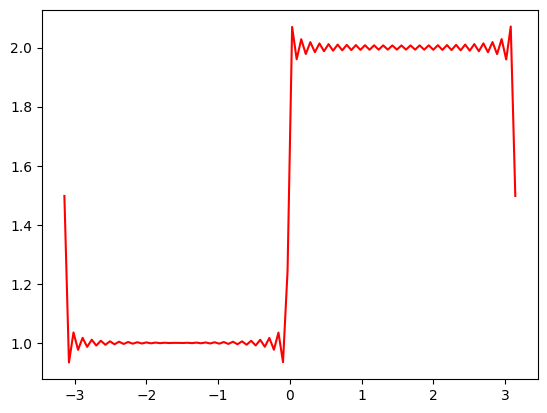

In [55]:
import matplotlib.pyplot as plt

t = np.linspace(-np.pi, np.pi, 100)
st = [serie(ti) for ti in t]

plt.plot(t, st, color="red")